In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style('whitegrid')

clean_data_dir = Path('../data/clean')

clean_datasets = {
    'Applications to Turkey': pd.read_csv(clean_data_dir / 'applications_to_turkey_clean.csv'),
    'Decisions from Turkey': pd.read_csv(clean_data_dir / 'decisions_from_turkey_clean.csv'),
    'Applications from Turkey': pd.read_csv(clean_data_dir / 'applications_from_turkey_clean.csv'),
    'Decisions from other countries': pd.read_csv(clean_data_dir / 'decisions_from_other_countries_clean.csv'),
}

print('Data loaded successfully!')

for name, df in clean_datasets.items():
    print(f"{name}: {len(df)} rows")

Data loaded successfully!
Applications to Turkey: 938 rows
Decisions from Turkey: 901 rows
Applications from Turkey: 1779 rows
Decisions from other countries: 1686 rows


In [2]:
print('Time range for each dataset:')
print()
for name, df in clean_datasets.items():
    print(f"{name}: {df['Year'].min()} - {df['Year'].max()}")

Time range for each dataset:

Applications to Turkey: 2000 - 2025
Decisions from Turkey: 2000 - 2023
Applications from Turkey: 2000 - 2025
Decisions from other countries: 2000 - 2025


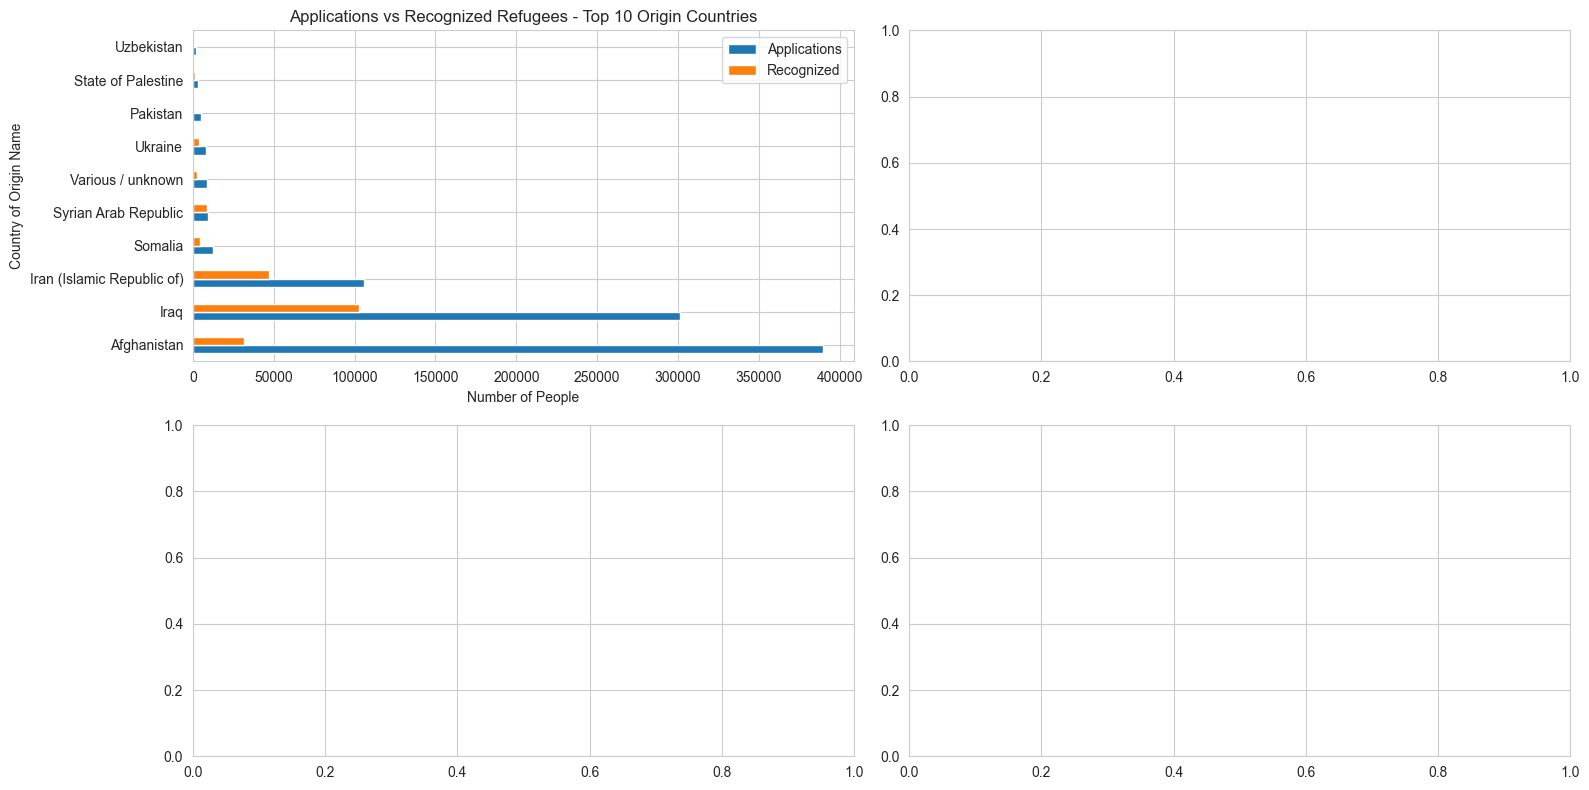

In [ ]:
# TODO
# top 10 origin countries (apps vs recognized), bar chart
# recognition rate by country, bar chart %
# line chart with per-year application
# top 5 countries over time, how composition changed. probably line chart

fig, axes = plt.subplots(2, 2, figsize=(16, 8))

total_apps = clean_datasets['Applications to Turkey'].groupby('Country of Origin Name')['Number of Applications'].sum()
total_recognized = clean_datasets['Decisions from Turkey'].groupby('Country of Origin Name')['Recognized'].sum()

comparison = pd.DataFrame({
    'Applications': total_apps,
    'Recognized': total_recognized
}).fillna(0)

top_countries_comparison = comparison.loc[total_apps.sort_values(ascending=False).head(10).index]
top_countries_comparison.plot(kind='barh', xlabel='Number of People', title='Applications vs Recognized Refugees - Top 10 Origin Countries', legend=['Applications', 'Recognized'], ax=axes[0, 0])

plt.tight_layout()
plt.show()